 # **PROJECT TITLE: PREDICTING CUSTOMER CHURN FOR SYRIATEL**

![Telcom](Images/Telcom.png)

# **BUSINESS UNDERSTANDING**

## **PROJECT OVERVIEW**
Customer churn is a major concern for telecommunication companies, as retaining existing customers is often more cost-effective than acquiring new ones. This project aims to develop a predictive model that can identify customers at high risk of leaving SyriaTel, a major telecom service provider. By leveraging historical customer data and machine learning techniques, this project provides insights into key churn indicators and enables proactive retention strategies.

## **PROBLEM STATEMENT**
SyriaTel, a telecommunications company, is facing a loss in revenue due to customer churn. The company wants to build a predictive model that can classify customers as likely to churn (1) or not churn (0) based on their service usage behavior and plan details. This will help SyriaTel identify at-risk customers early and take proactive retention actions.

## **OBJECTIVES**
1. To analyze the customer data to understand churn behavior.

2. To identify the most important features influencing churn.

3. To train a machine learning model to predict churn.

4. To evaluate model performance and recommend strategies for customer retention.

In [ ]:
# Importing libraries

import pandas as pd # To load, manipulate, and analyze structured data in the form of DataFrames
import numpy as np # To perform numerical operations and handle arrays
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns #  Complex plots like heatmaps, boxplots, and histograms.
import numpy as np # 
import os # Interacts with the operating system
import warnings # Manages warnings in the code execution
from sklearn.preprocessing import LabelEncoder, StandardScaler # Encodes categorical labels into integers and scales features
from sklearn.model_selection import train_test_split # Splits the dataset into training and testing subsets.
from sklearn.linear_model import LogisticRegression # A classifier used for binary or multiclass classification problems 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # Returns a confusion matrix showing correct and incorrect classifications.
from sklearn.tree import DecisionTreeClassifier # for classification (and regression) by learning decision rules from data.
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score # For evaluating the performance of classification models

# **1. DATA LOADING**
Is about getting the data from its raw form into a usable structure (a Pandas DataFrame) in your Python environment.

It involves:

File Reading- use the Pandas read_csv() function to load the data.

DataFrame Creation- The read_csv() function will return a Pandas DataFrame object, which is essentially a table-like structure with rows and columns.

In [74]:
# Loading the dataset
df_Telcom = pd.read_csv('Data/bigml_59c28831336c6604c800002a.csv')
df_Telcom

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [3]:
# Checking the number of rows and columns
df_Telcom.shape

(3333, 21)

In [4]:
# Checking the shape of the dataset
df_Telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
# Checking the sumary statistics of the dataset
df_Telcom.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
# Checking for missing values
df_Telcom.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

 There are no missing values

In [7]:
# Check for duplicates
df_Telcom.duplicated().sum() 

0

There are no duplicates.

In [ ]:
# Sving the dataset to Excel
df_Telcom.to_excel('Data/Telcom_data.xlsx', index=False)

# **2. EDA (DATA ANALYSIS) & DATA VISUALIZATION**


Exploratory Data Analysis is the process of examining and understanding the dataset before building any models.
Data Analysis is the systematic process of examining and interpreting the customer data collected by SyriaTel to uncover meaningful insights, patterns, trends, and relationships—particularly those that relate to customer churn.

### **1. Univariate Analysis**
Examining one variable at a time.

The goal is to understand the distribution, central tendency, and outliers for individual columns.**

#### **Customer Churn Distribution**

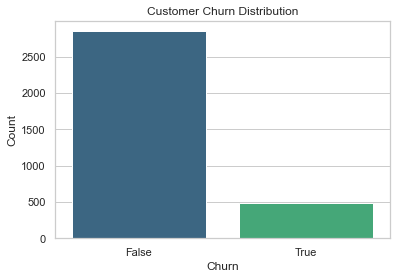

In [104]:
sns.countplot(data=df_Telcom, x='churn', palette='viridis')
plt.title('Customer Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


The number of customers who did not churn is significantly higher than the number of customers who did churn. 

#### **Distribution of Total Day Minutes**

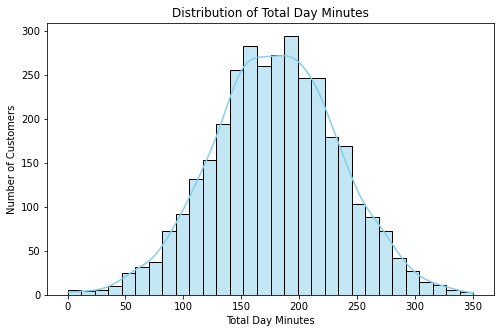

In [69]:
plt.figure(figsize=(8, 5))
sns.histplot(df_Telcom['total day minutes'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Total Day Minutes')
plt.xlabel('Total Day Minutes')
plt.ylabel('Number of Customers')
plt.show()


 The above plot implies that the data is well-behaved and doesn't have extreme skewness that might require complex transformations before modeling.

#### **Distribution of International Plan Subscription**

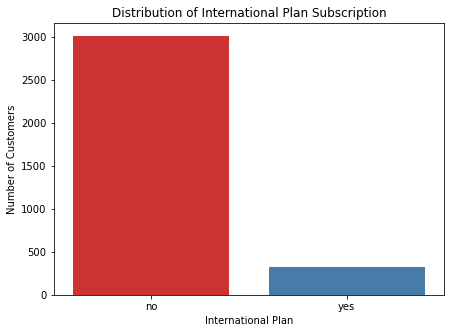

In [87]:
plt.figure(figsize=(7, 5))
sns.countplot(x='international plan', data=df_Telcom, palette='Set1')
plt.title('Distribution of International Plan Subscription')
plt.xlabel('International Plan')
plt.ylabel('Number of Customers')
plt.show()

Customers with an international plan showed a higher likelihood of churn compared to those without.

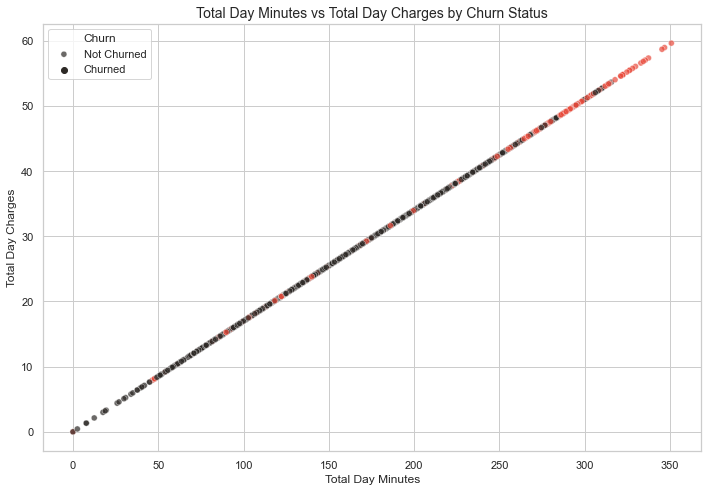

In [ ]:
# Set seaborn style
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(10, 7))
scatter = sns.scatterplot(
    data=df_Telcom,
    x='total day minutes',
    y='total day charge',
    hue='churn',
    # Not churned: dark, Churned: red
    palette={0: '#2D2926', 1: '#E94B3C'},  
    alpha=0.7
)

# Plot title and labels
plt.title('Total Day Minutes vs Total Day Charges by Churn Status', fontsize=14)
plt.xlabel('Total Day Minutes')
plt.ylabel('Total Day Charges')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])


plt.tight_layout()
plt.show()


Churned customers often had higher day-time minutes and charges, possibly indicating dissatisfaction with cost-effectiveness.

### **2. Bivariate Analysis**
Analyzing two variables together to explore relationships — usually feature vs. target (churn).

#### **Churn by International Plan**

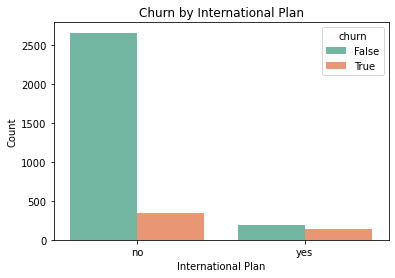

In [78]:
sns.countplot(data=df_Telcom, x='international plan', hue='churn', palette='Set2')
plt.title('Churn by International Plan')
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.show()


 Customers who subscribe to an international plan appear to be at a significantly higher risk of churning. This makes 'international plan' a very important feature for your churn prediction model. It suggests that customers with this plan might have specific needs or expectations that, if not met, lead to them leaving the service.

#### **Churn by Voice Mail Plan**

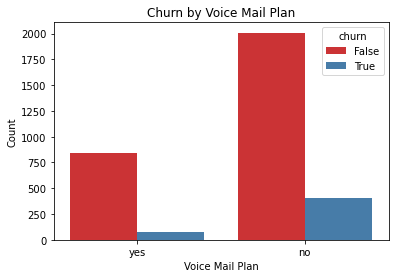

In [80]:
sns.countplot(data=df_Telcom, x='voice mail plan', hue='churn', palette='Set1')
plt.title('Churn by Voice Mail Plan')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Count')
plt.show()


Identifying 'Contract Type' as a highly influential factor in customer churn. It clearly shows that customers on flexible, month-to-month contracts are the primary group contributing to churn, making this a critical feature for your predictive model and for business intervention strategies.

#### **Boxplot: Total International Charges by Churn**

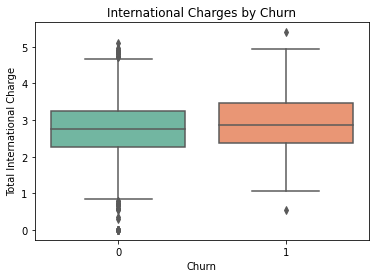

In [64]:
sns.boxplot(data=df_Telcom, x='churn', y='total intl charge', palette='Set2')
plt.title('International Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Total International Charge')
plt.show()


This plot is crucial for identifying whether a specific numerical feature is a significant predictor of churn. The visual separation of the box plots like the medians provides strong evidence that the numerical feature represented here plays an important role in distinguishing between customers who stay and those who leave.

#### **Churn vs Customer Service Calls**

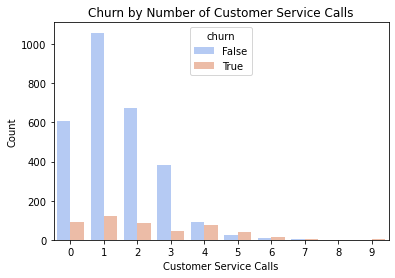

In [ ]:
sns.countplot(data=df_Telcom, x='customer service calls', hue='churn', palette='coolwarm')
plt.title('Churn by Number of Customer Service Calls')
plt.xlabel('Customer Service Calls')
plt.ylabel('Count')
plt.show()


This plot clearly illustrates that customer dissatisfaction, often reflected in a higher number of customer service calls, is a major driver of churn in this dataset.
Customers with more customer service calls were significantly more likely to churn.

### **3. Multivariate Analysis**
 Examining three or more variables at once to uncover complex relationships and interactions.

#### **Pairplot of Selected Features**

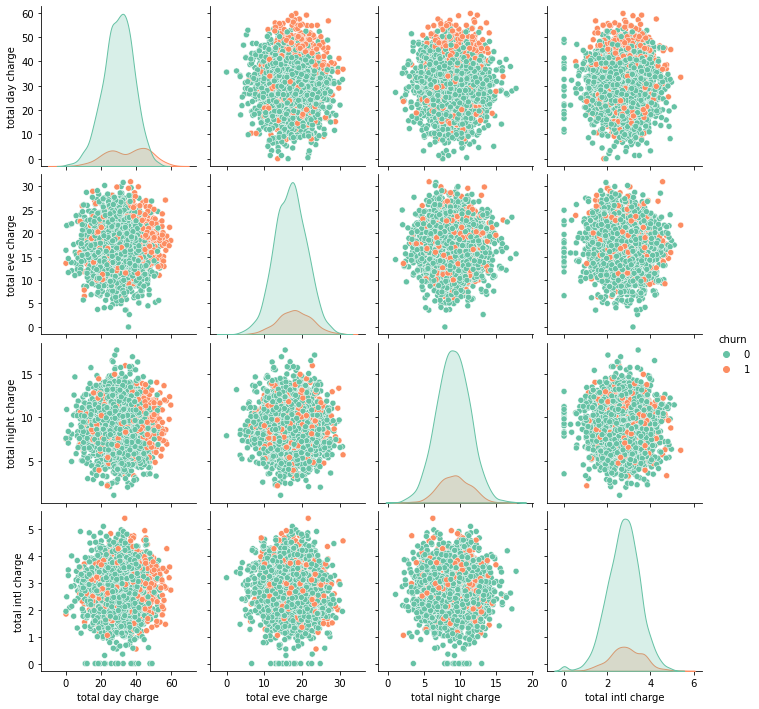

In [16]:
selected = ['total day charge', 'total eve charge', 'total night charge', 'total intl charge', 'churn']
sns.pairplot(df_Telcom[selected], hue='churn', palette='Set2', diag_kind='kde')
plt.show()


The plot strongly emphasizes that total day charge is a key financial indicator of churn risk, whereas other charge-related features (eve, night, intl) show less individual predictive power. 

#### **Correlation Heatmap for Numeric Features**

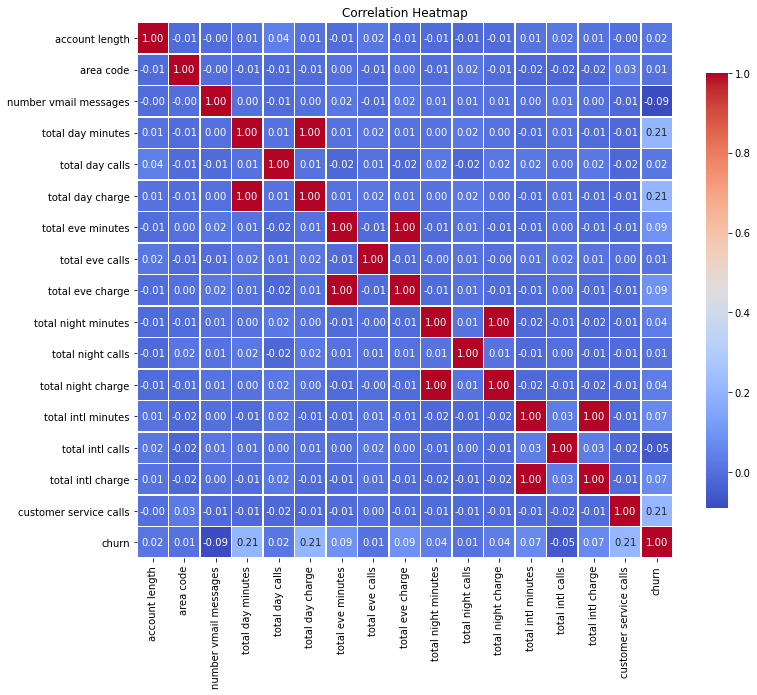

In [ ]:
# Converting churn to int if it's boolean
df_Telcom['churn'] = df_Telcom['churn'].astype(int)

# Computing correlation matrix 
corr = df_Telcom.corr()

# Plot of the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Differences in usage behavior (e.g., total day minutes, intl charge, customer service calls) between churned and non-churned customers were clearly visible.

# **4. DATA MODELING**
Is the step where you build predictive models to forecast customer behavior — specifically, to predict whether a customer will churn (leave) or stay. It's the core of any machine learning project.

## **1. Preprocessing**
cleaning and preparing data before feeding it into a machine learning model. It is basically getting data into the best possible shape so the model can learn from it accurately and efficiently.

In [26]:

# Convert churn column to binary if it's boolean
df_Telcom['churn'] = df_Telcom['churn'].astype(int)

# Encode categorical columns
df_encoded = pd.get_dummies(df_Telcom.drop(['phone number'], axis=1), drop_first=True)

# Scale numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded.drop('churn', axis=1))

X = pd.DataFrame(scaled_features, columns=df_encoded.columns[:-1])
y = df_encoded['churn']


## **2. Train-Test Split**
It's where data is divided int two parts:

Training set: Used to train your machine learning model.

Testing set: Used to evaluate how well the model performs on unseen data.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **3. Bulding a Classifier model**
Creating a machine learning model that can classify data into categories.

In [30]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [ ]:
# Train Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Train Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)
y_pred_dt = dtree.predict(X_test)

# Calculate accuracy and f1 score
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f'Logistic Regression Accuracy: {accuracy_logreg:.4f}')
print(f'Decision Tree Accuracy: {accuracy_dt:.4f}')

Logistic Regression Accuracy: 0.8576
Decision Tree Accuracy: 0.9295


## **4. Confusion Matrix**
Is a performance evaluation tool ued for classification models to show how well the model is making predictions compared to actual values.

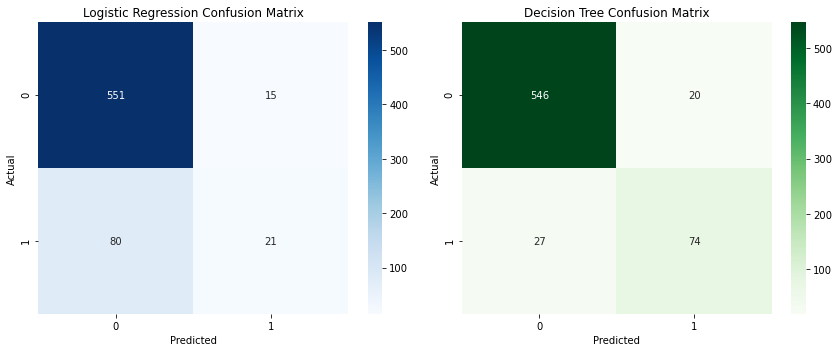

In [ ]:
# Plotting confusion matrices side by side
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_dt = confusion_matrix(y_test, y_pred_dt)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Decision Tree Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

#### **Logistic Regression** 

True Negatives (TN): 551 — correctly predicted non-churners

False Positives (FP): 15 — predicted churn but actually didn’t churn

False Negatives (FN): 80 — predicted not churn, but they actually churned

True Positives (TP): 21 — correctly predicted churners

#### **Accuracy: 86%**

F1-Score for class 1 (churn): Very low (0.31), meaning the model struggles to correctly identify churners.
Interpretation: Logistic Regression heavily favors predicting "not churn", missing many actual churners (high FN). It has a class imbalance problem.

Decision Tree (Right Confusion Matrix)
True Negatives (TN): 546

False Positives (FP): 20

False Negatives (FN): 27

True Positives (TP): 74

#### **Accuracy: 93%**

F1-Score for class 1 (churn): Much better at 0.76

Interpretation: The Decision Tree classifier performs significantly better at identifying both churners and non-churners. It balances between precision and recall better than logistic regression.




## **5.Accuracy and F1 Score Comparison**
Accuracy is the ratio of correctly predicted insatnces(both positives and negatives) to the instances. It is used when the dataset is balanced.

F1 Score is the harmonic mean of precision and recall. It balances false positives and false negatives. It is used when the dataset is imbalanced.



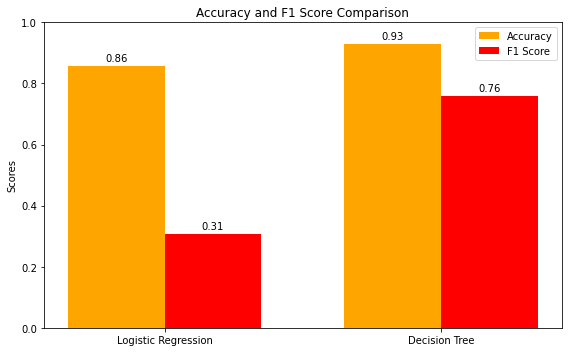

In [61]:
# Calculating metrics
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Data uesd for plotting
models = ['Logistic Regression', 'Decision Tree']
accuracy_scores = [accuracy_logreg, accuracy_dt]
f1_scores = [f1_logreg, f1_dt]

 # label for locations
x = np.arange(len(models))
# bar width 
width = 0.35  

fig, ax = plt.subplots(figsize=(8,5))

# Bars
rects1 = ax.bar(x - width/2, accuracy_scores, width, label='Accuracy', color='orange')
rects2 = ax.bar(x + width/2, f1_scores, width, label='F1 Score', color='red')

# Adding some text for labels title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Accuracy and F1 Score Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim([0,1])
ax.legend()

# Attaching score labels on bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                     # offset label above bar
                    xytext=(0,3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


#### **Logistic Regression:**

Accuracy: 0.86 — It looks decent, but misleading due to imbalanced classes.

F1-Score: 0.31 — This indicates poor performance in identifying actual churners.

#### **Decision Tree:**

Accuracy: 0.93 — clearly better.

F1-Score: 0.76 — more balanced and reliable.

While both models achieve high accuracy, the Decision Tree outperforms Logistic Regression especially in F1-score, which is crucial in imbalanced binary classification like churn prediction. It means the Decision Tree is better at finding the actual churners and not just guessing the majority class. 




### **Conclusion:**
The Decision Tree model is much more effective for this churn prediction task. It provides a better tradeoff between detecting churners and keeping false positives low, which is exactly what a telecom company would need for proactive retention efforts.
